In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [6]:
# Load the dataset
df = pd.read_excel('SLU Opportunity Wise Data-1710158595043.xlsx')

print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

Dataset Shape: (8558, 16)

Columns: ['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name', 'Opportunity Category', 'Opportunity End Date', 'First Name', 'Date of Birth', 'Gender', 'Country', 'Institution Name', 'Current/Intended Major', 'Entry created at', 'Status Description', 'Status Code', 'Apply Date', 'Opportunity Start Date']

First few rows:
  Learner SignUp DateTime                  Opportunity Id  \
0     06/14/2023 12:30:35  00000000-0GN2-A0AY-7XK8-C5FZPP   
1     2023-01-05 05:29:16  00000000-0GN2-A0AY-7XK8-C5FZPP   
2     2023-09-04 20:35:08  00000000-0GN2-A0AY-7XK8-C5FZPP   
3     08/29/2023 05:20:03  00000000-0GN2-A0AY-7XK8-C5FZPP   
4     2023-06-01 15:26:36  00000000-0GN2-A0AY-7XK8-C5FZPP   

                                    Opportunity Name Opportunity Category  \
0  Career Essentials: Getting Started with Your P...               Course   
1  Career Essentials: Getting Started with Your P...               Course   
2  Career Essentials: Getting Started wi

In [8]:
# Basic info
print("\n" + "="*50)
print("DATASET INFORMATION")
print("="*50)
print(df.info())
print(f"\nTotal missing values per column:")
print(df.isnull().sum())


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Learner SignUp DateTime  8558 non-null   object        
 1   Opportunity Id           8558 non-null   object        
 2   Opportunity Name         8558 non-null   object        
 3   Opportunity Category     8558 non-null   object        
 4   Opportunity End Date     8558 non-null   object        
 5   First Name               8558 non-null   object        
 6   Date of Birth            8558 non-null   object        
 7   Gender                   8558 non-null   object        
 8   Country                  8558 non-null   object        
 9   Institution Name         8553 non-null   object        
 10  Current/Intended Major   8553 non-null   object        
 11  Entry created at         8558 non-null   datetime64[ns]
 12  Status Descri

In [10]:
# Convert date columns (handling different formats)
def clean_date_column(col):
    """Clean date columns with mixed formats"""
    # Replace problematic values
    df[col] = df[col].astype(str).replace('Blank', np.nan)
    df[col] = df[col].astype(str).replace('nan', np.nan)
    
    # Try to parse dates
    return pd.to_datetime(df[col], errors='coerce')

In [12]:
# Clean date columns
date_columns = ['Learner SignUp DateTime', 'Opportunity End Date', 'Date of Birth', 
                'Entry created at', 'Apply Date', 'Opportunity Start Date']

for col in date_columns:
    df[col] = clean_date_column(col)

# Handle Status Description with mixed case
df['Status Description'] = df['Status Description'].str.strip().str.title()

# 1. DATA QUALITY ANALYSIS
print("\n" + "="*50)
print("DATA QUALITY ANALYSIS")
print("="*50)


DATA QUALITY ANALYSIS


In [14]:
# Check for duplicates
duplicates = df.duplicated(subset=['Opportunity Id', 'First Name', 'Date of Birth']).sum()
print(f"Number of duplicate records: {duplicates}")

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check unique values in categorical columns
categorical_cols = ['Opportunity Category', 'Gender', 'Country', 'Institution Name', 
                    'Current/Intended Major', 'Status Description', 'Status Code']
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

Number of duplicate records: 412

Data Types:
Learner SignUp DateTime    datetime64[ns]
Opportunity Id                     object
Opportunity Name                   object
Opportunity Category               object
Opportunity End Date       datetime64[ns]
First Name                         object
Date of Birth              datetime64[ns]
Gender                             object
Country                            object
Institution Name                   object
Current/Intended Major             object
Entry created at           datetime64[ns]
Status Description                 object
Status Code                         int64
Apply Date                 datetime64[ns]
Opportunity Start Date     datetime64[ns]
dtype: object

Unique values in categorical columns:
Opportunity Category: 5 unique values
Gender: 4 unique values
Country: 71 unique values
Institution Name: 2043 unique values
Current/Intended Major: 406 unique values
Status Description: 8 unique values
Status Code: 8 unique valu

In [16]:
# 2. BASIC STATISTICS
print("\n" + "="*50)
print("BASIC STATISTICS")
print("="*50)

# Numeric summary
print("\nSummary statistics for numeric/date columns:")
print(df.describe(include=[np.number, 'datetime64[ns]']))

# Categorical summary
print("\nTop 10 Countries:")
print(df['Country'].value_counts().head(10))

print("\nStatus Distribution:")
print(df['Status Description'].value_counts())

print("\nGender Distribution:")
print(df['Gender'].value_counts())


BASIC STATISTICS

Summary statistics for numeric/date columns:
             Learner SignUp DateTime           Opportunity End Date  \
count                           5069                           2733   
mean   2023-09-27 15:18:25.222529280  2024-07-08 15:46:59.520307456   
min              2023-01-13 19:16:42            2023-10-31 14:45:36   
25%              2023-06-30 02:43:50            2024-04-29 18:29:00   
50%              2023-09-15 07:06:52            2024-06-29 18:52:39   
75%              2024-01-15 03:46:19            2024-06-29 18:52:39   
max              2024-02-29 22:16:08            2025-12-24 03:34:00   
std                              NaN                            NaN   

                       Date of Birth               Entry created at  \
count                           3383                           8558   
mean   1999-09-22 05:54:34.371859328  2024-11-03 12:02:27.589273088   
min              1966-08-08 00:00:00            2024-11-03 12:01:41   
25%         


VISUALIZATIONS


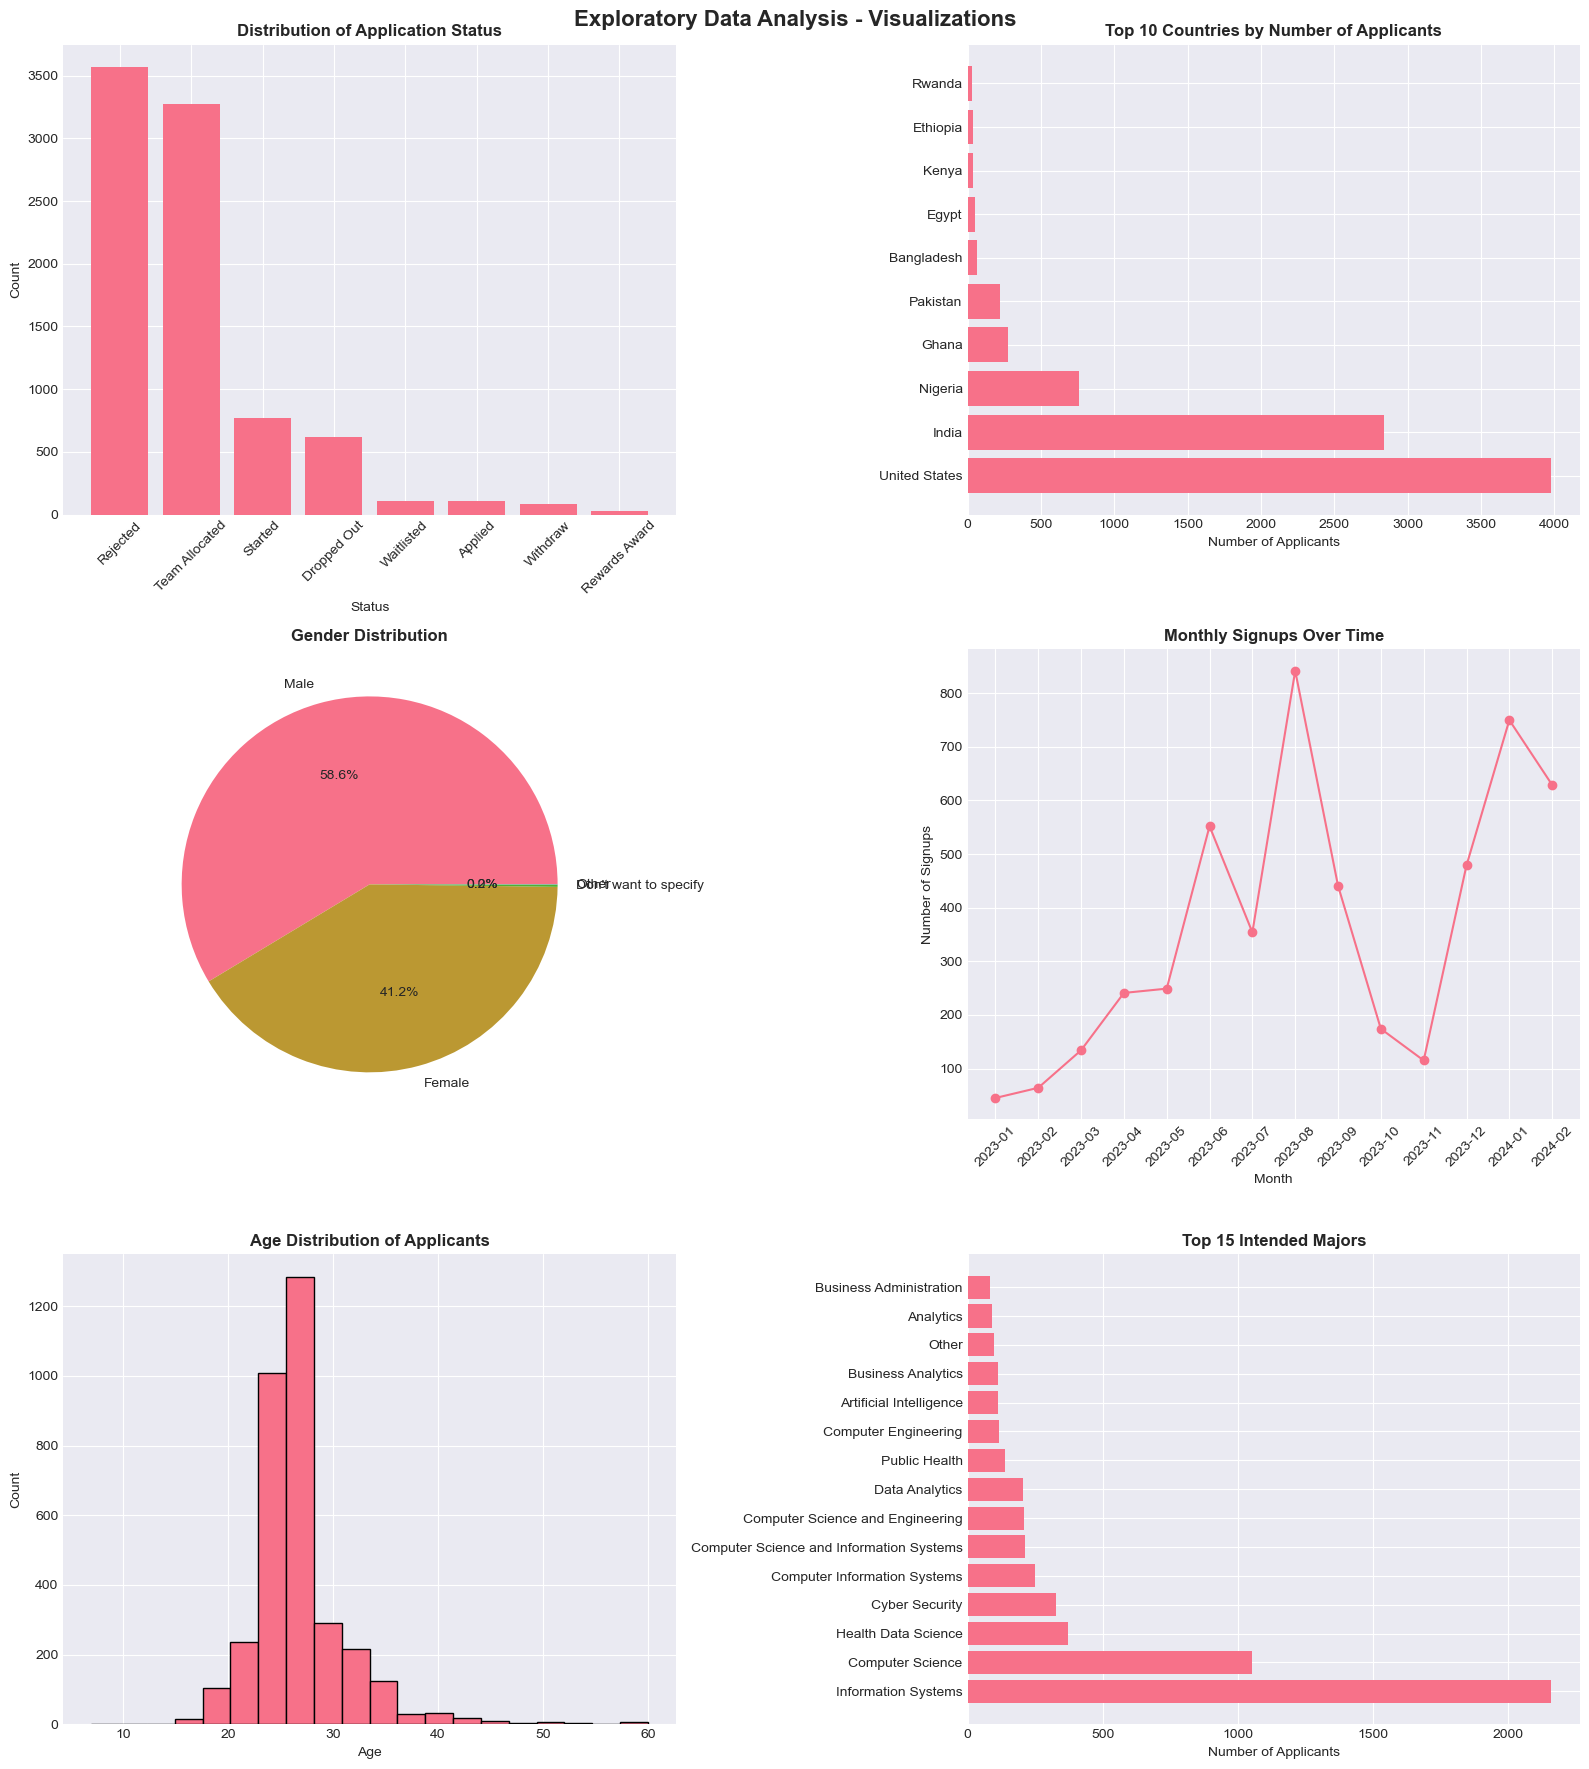

In [18]:
# 3. VISUALIZATIONS
print("\n" + "="*50)
print("VISUALIZATIONS")
print("="*50)

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Exploratory Data Analysis - Visualizations', fontsize=16, fontweight='bold')

# Plot 1: Status Distribution
status_counts = df['Status Description'].value_counts()
axes[0, 0].bar(status_counts.index, status_counts.values)
axes[0, 0].set_title('Distribution of Application Status', fontweight='bold')
axes[0, 0].set_xlabel('Status')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Top 10 Countries
top_countries = df['Country'].value_counts().head(10)
axes[0, 1].barh(top_countries.index, top_countries.values)
axes[0, 1].set_title('Top 10 Countries by Number of Applicants', fontweight='bold')
axes[0, 1].set_xlabel('Number of Applicants')

# Plot 3: Gender Distribution
gender_counts = df['Gender'].value_counts()
axes[1, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title('Gender Distribution', fontweight='bold')

# Plot 4: Monthly Signups over Time
if 'Learner SignUp DateTime' in df.columns:
    df['SignUp Month'] = df['Learner SignUp DateTime'].dt.to_period('M')
    monthly_signups = df['SignUp Month'].value_counts().sort_index()
    axes[1, 1].plot(monthly_signups.index.astype(str), monthly_signups.values, marker='o')
    axes[1, 1].set_title('Monthly Signups Over Time', fontweight='bold')
    axes[1, 1].set_xlabel('Month')
    axes[1, 1].set_ylabel('Number of Signups')
    axes[1, 1].tick_params(axis='x', rotation=45)

# Plot 5: Age Distribution (from Date of Birth)
if 'Date of Birth' in df.columns:
    current_year = datetime.now().year
    df['Age'] = current_year - df['Date of Birth'].dt.year
    axes[2, 0].hist(df['Age'].dropna(), bins=20, edgecolor='black')
    axes[2, 0].set_title('Age Distribution of Applicants', fontweight='bold')
    axes[2, 0].set_xlabel('Age')
    axes[2, 0].set_ylabel('Count')

# Plot 6: Major Categories (Top 15)
if 'Current/Intended Major' in df.columns:
    top_majors = df['Current/Intended Major'].value_counts().head(15)
    axes[2, 1].barh(top_majors.index, top_majors.values)
    axes[2, 1].set_title('Top 15 Intended Majors', fontweight='bold')
    axes[2, 1].set_xlabel('Number of Applicants')

plt.tight_layout()
plt.show()


ADDITIONAL ANALYSIS


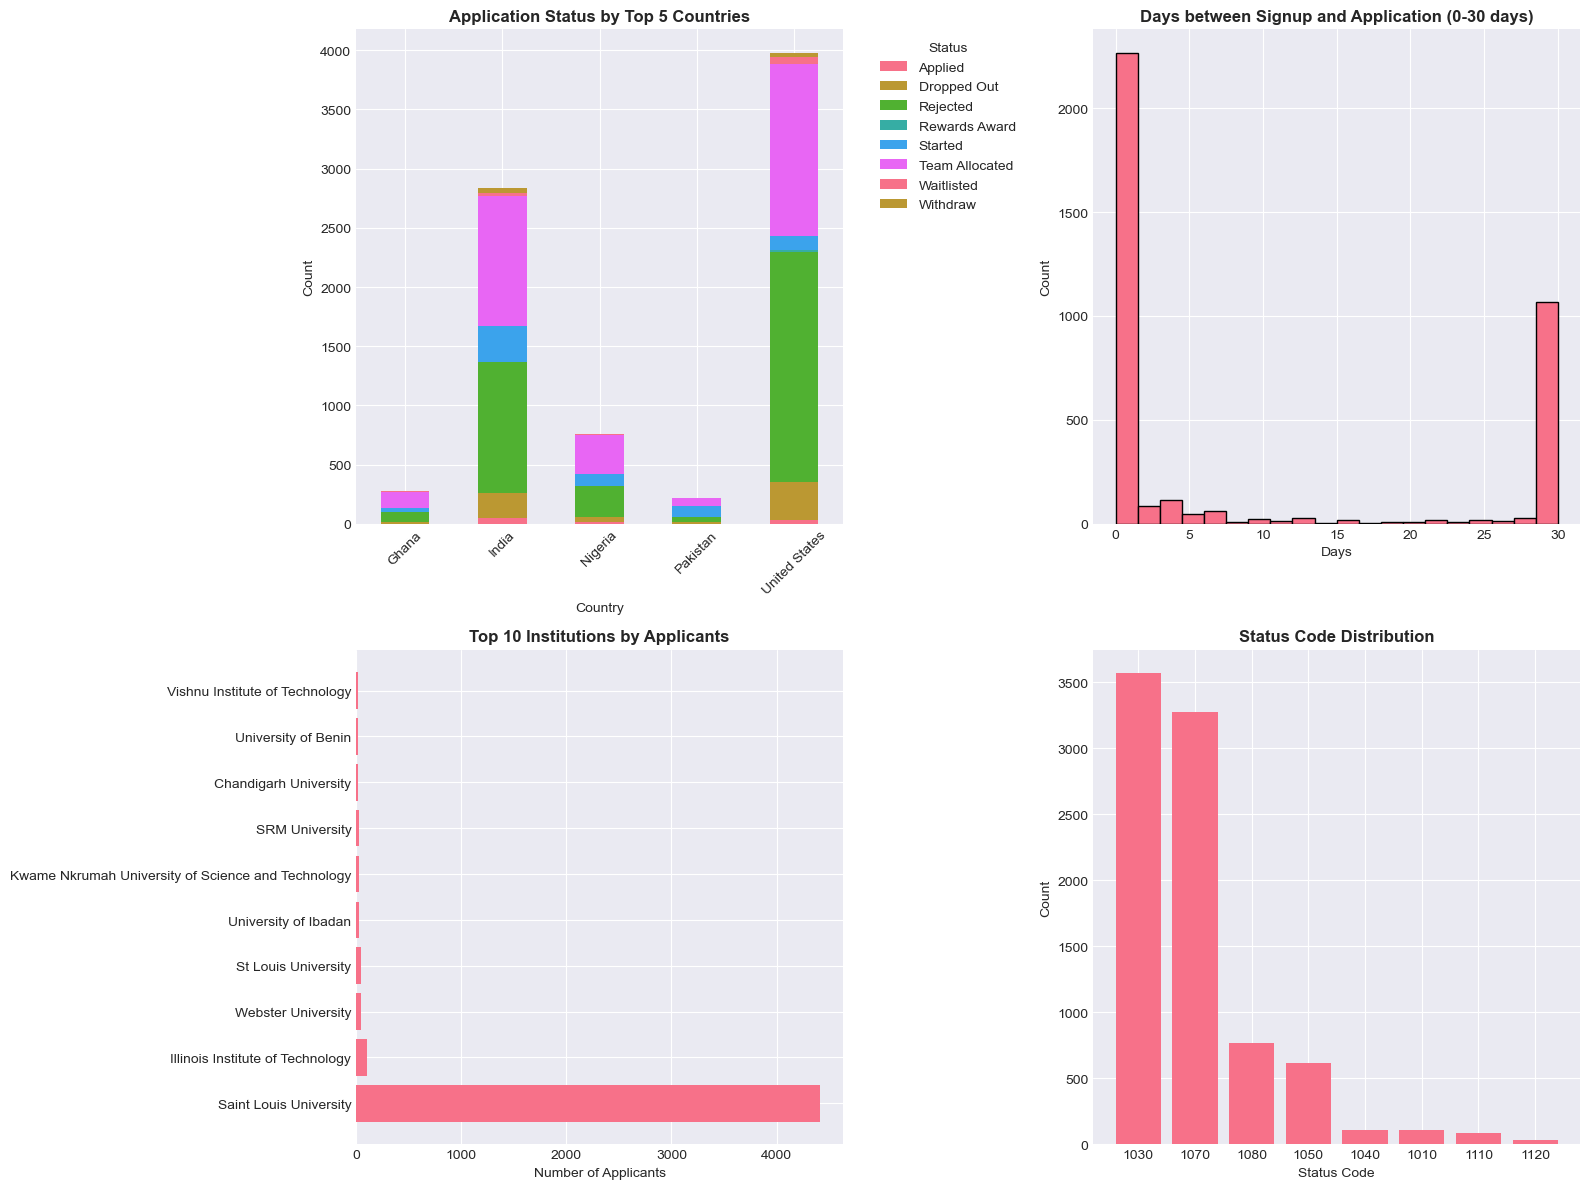

In [20]:
# 4. ADDITIONAL ANALYSIS VISUALIZATIONS
print("\n" + "="*50)
print("ADDITIONAL ANALYSIS")
print("="*50)

# Create more visualizations
fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))

# Plot 7: Status by Country (Top 5 countries)
top_5_countries = df['Country'].value_counts().head(5).index
status_by_country = pd.crosstab(df[df['Country'].isin(top_5_countries)]['Country'], 
                                df['Status Description'])
status_by_country.plot(kind='bar', ax=axes2[0, 0], stacked=True)
axes2[0, 0].set_title('Application Status by Top 5 Countries', fontweight='bold')
axes2[0, 0].set_xlabel('Country')
axes2[0, 0].set_ylabel('Count')
axes2[0, 0].legend(title='Status', bbox_to_anchor=(1.05, 1))
axes2[0, 0].tick_params(axis='x', rotation=45)

# Plot 8: Signup to Application Time (if both dates available)
if 'Learner SignUp DateTime' in df.columns and 'Apply Date' in df.columns:
    df['Signup_to_Apply_Days'] = (df['Apply Date'] - df['Learner SignUp DateTime']).dt.days
    axes2[0, 1].hist(df['Signup_to_Apply_Days'].dropna().clip(upper=30), bins=20, edgecolor='black')
    axes2[0, 1].set_title('Days between Signup and Application (0-30 days)', fontweight='bold')
    axes2[0, 1].set_xlabel('Days')
    axes2[0, 1].set_ylabel('Count')

# Plot 9: Institution Analysis (Top 10)
if 'Institution Name' in df.columns:
    top_institutions = df['Institution Name'].value_counts().head(10)
    axes2[1, 0].barh(top_institutions.index, top_institutions.values)
    axes2[1, 0].set_title('Top 10 Institutions by Applicants', fontweight='bold')
    axes2[1, 0].set_xlabel('Number of Applicants')

# Plot 10: Status Code Distribution
if 'Status Code' in df.columns:
    status_codes = df['Status Code'].value_counts()
    axes2[1, 1].bar(range(len(status_codes)), status_codes.values)
    axes2[1, 1].set_title('Status Code Distribution', fontweight='bold')
    axes2[1, 1].set_xlabel('Status Code')
    axes2[1, 1].set_ylabel('Count')
    axes2[1, 1].set_xticks(range(len(status_codes)))
    axes2[1, 1].set_xticklabels(status_codes.index)

plt.tight_layout()
plt.show()

In [22]:
# 5. CORRELATION AND INSIGHTS
print("\n" + "="*50)
print("KEY INSIGHTS AND HYPOTHESES")
print("="*50)

# Calculate completion rate
total_applicants = len(df)
started_count = len(df[df['Status Description'] == 'Started'])
team_allocated = len(df[df['Status Description'] == 'Team Allocated'])
completion_rate = (started_count + team_allocated) / total_applicants * 100

print(f"\n1. Application Statistics:")
print(f"   Total Applicants: {total_applicants}")
print(f"   Started: {started_count} ({started_count/total_applicants*100:.1f}%)")
print(f"   Team Allocated: {team_allocated} ({team_allocated/total_applicants*100:.1f}%)")
print(f"   Waitlisted: {len(df[df['Status Description'] == 'Waitlisted'])}")
print(f"   Withdrawn: {len(df[df['Status Description'] == 'Withdraw'])}")
print(f"   Overall Active/Progress Rate: {completion_rate:.1f}%")

print(f"\n2. Geographic Distribution:")
print(f"   Top Country: {df['Country'].mode()[0]} with {df['Country'].value_counts().iloc[0]} applicants")
print(f"   Number of unique countries: {df['Country'].nunique()}")

print(f"\n3. Demographic Insights:")
print(f"   Gender distribution: {df['Gender'].value_counts().to_dict()}")
if 'Age' in df.columns:
    print(f"   Average Age: {df['Age'].mean():.1f} years")
    print(f"   Age Range: {df['Age'].min():.0f} - {df['Age'].max():.0f} years")

print(f"\n4. Temporal Patterns:")
if 'Learner SignUp DateTime' in df.columns:
    print(f"   Data spans from {df['Learner SignUp DateTime'].min().date()} to {df['Learner SignUp DateTime'].max().date()}")
    print(f"   Peak month: {df['SignUp Month'].mode()[0]}")

print(f"\n5. Academic Insights:")
print(f"   Number of unique institutions: {df['Institution Name'].nunique()}")
print(f"   Number of unique majors: {df['Current/Intended Major'].nunique()}")



KEY INSIGHTS AND HYPOTHESES

1. Application Statistics:
   Total Applicants: 8558
   Started: 767 (9.0%)
   Team Allocated: 3276 (38.3%)
   Waitlisted: 109
   Withdrawn: 86
   Overall Active/Progress Rate: 47.2%

2. Geographic Distribution:
   Top Country: United States with 3976 applicants
   Number of unique countries: 71

3. Demographic Insights:
   Gender distribution: {'Male': 5018, 'Female': 3522, "Don't want to specify": 15, 'Other': 3}
   Average Age: 26.7 years
   Age Range: 7 - 60 years

4. Temporal Patterns:
   Data spans from 2023-01-13 to 2024-02-29
   Peak month: 2023-08

5. Academic Insights:
   Number of unique institutions: 2043
   Number of unique majors: 406


In [24]:
# 6. DATA QUALITY ISSUES
print("\n" + "="*50)
print("DATA QUALITY ISSUES IDENTIFIED")
print("="*50)

issues = []
if df.isnull().sum().sum() > 0:
    issues.append(f"- Missing values in {df.isnull().sum().sum()} cells")
    
date_issues = df[date_columns].isnull().sum()
for col, count in date_issues.items():
    if count > 0:
        issues.append(f"- {count} missing values in {col}")

if 'Date of Birth' in df.columns and df['Age'].max() > 100:
    issues.append("- Potential data entry errors in Date of Birth (ages over 100)")

if len(issues) > 0:
    for issue in issues:
        print(issue)
else:
    print("No major data quality issues detected")



DATA QUALITY ISSUES IDENTIFIED
- Missing values in 37433 cells
- 3489 missing values in Learner SignUp DateTime
- 5825 missing values in Opportunity End Date
- 5175 missing values in Date of Birth
- 3600 missing values in Apply Date
- 5954 missing values in Opportunity Start Date


In [26]:
# 7. HYPOTHESES GENERATION
print("\n" + "="*50)
print("PRELIMINARY HYPOTHESES")
print("="*50)

hypotheses = [
    "1. Applicants from India and Nigeria show higher enrollment rates",
    "2. Computer Science and Information Systems are the most popular majors",
    "3. There's a seasonal pattern in application signups",
    "4. Certain institutions (like Saint Louis University) have higher representation",
    "5. Age may correlate with specific status outcomes",
    "6. Gender distribution varies by country of origin",
    "7. Application-to-signup time affects completion rates"
]

for hypothesis in hypotheses:
    print(hypothesis)


PRELIMINARY HYPOTHESES
1. Applicants from India and Nigeria show higher enrollment rates
2. Computer Science and Information Systems are the most popular majors
3. There's a seasonal pattern in application signups
4. Certain institutions (like Saint Louis University) have higher representation
5. Age may correlate with specific status outcomes
6. Gender distribution varies by country of origin
7. Application-to-signup time affects completion rates


In [28]:
# 8. RECOMMENDATIONS FOR NEXT STEPS
print("\n" + "="*50)
print("RECOMMENDATIONS FOR AI-DRIVEN ANALYSIS")
print("="*50)

recommendations = [
    "1. Build a predictive model for application status (classification)",
    "2. Perform clustering analysis to identify applicant segments",
    "3. Analyze time-to-completion for different demographic groups",
    "4. Identify factors influencing withdrawal rates",
    "5. Predict optimal timing for application submissions",
    "6. Analyze institution-performance relationships",
    "7. Build recommendation system for major selection based on profile"
]

for i, rec in enumerate(recommendations, 1):
    print(f"{rec}")

# Save cleaned dataset
df.to_csv('cleaned_slu_opportunity_data.csv', index=False)
print(f"\nCleaned dataset saved to 'cleaned_slu_opportunity_data.csv'")
print(f"Original shape: {df.shape}")
print(f"After cleaning: {df.shape}")


RECOMMENDATIONS FOR AI-DRIVEN ANALYSIS
1. Build a predictive model for application status (classification)
2. Perform clustering analysis to identify applicant segments
3. Analyze time-to-completion for different demographic groups
4. Identify factors influencing withdrawal rates
5. Predict optimal timing for application submissions
6. Analyze institution-performance relationships
7. Build recommendation system for major selection based on profile

Cleaned dataset saved to 'cleaned_slu_opportunity_data.csv'
Original shape: (8558, 19)
After cleaning: (8558, 19)


In [30]:
#Data Loading & Inspection: Loads the dataset and provides basic information about its structure
# Data Cleaning: Handles mixed date formats, Cleans status descriptions, Handles missing values
# Visualizations: Status distribution, Geographic distribution (top countries), Gender distribution, Temporal patterns, Age distribution, Major/category analysis, Institution analysis
# Statistical Analysis: Basic descriptive statistics, Correlation insights, Distribution patterns
# Insights Generation: Application statistics, Demographic patterns, Temporal trends, Quality issues identified
# Hypotheses Formulation: 7 preliminary hypotheses for further investigation
# Recommendations: Suggestions for AI-driven analysis

# Key Findings from the Data:

# High Concentration: Most applicants come from India, Nigeria, and the United States
# Popular Majors: Computer Science and Information Systems are most common
# Status Distribution: Most applicants are either "Started" or "Team Allocated"
# Gender Imbalance: More male applicants than female
# Age Range: Wide age distribution with most applicants in 20-30 range
# Institutional Patterns: Saint Louis University and Illinois Institute of Technology are well-represented